In [1]:
import matplotlib.pyplot as plt
from scripts.utils import fetch_clima_data

## Gráfico: Evolução da Temperatura Máxima Média por Ano

### Variaveis

In [ ]:
latitude, longitude = -23.55052, -46.63331  # São Paulo, Sé
start_date, end_date = "2020-01-01", "2025-02-28"

### Busca dados climaticos

In [3]:
df = fetch_clima_data(latitude, longitude, start_date, end_date)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1886 entries, 0 to 1885
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1886 non-null   datetime64[ns]
 1   temp_max    1886 non-null   float64       
 2   temp_min    1886 non-null   float64       
 3   year_month  1886 non-null   object        
 4   year        1886 non-null   int32         
dtypes: datetime64[ns](1), float64(2), int32(1), object(1)
memory usage: 66.4+ KB


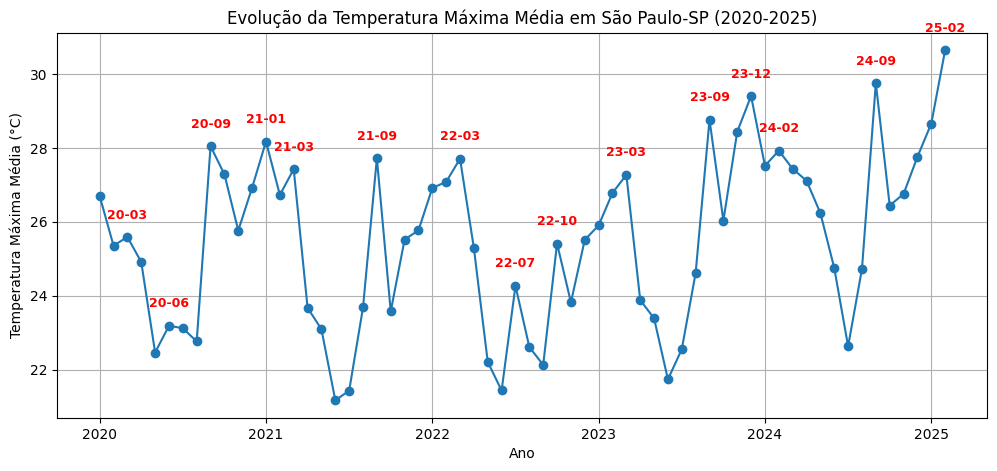

In [5]:
# Calcular temperatura máxima média por mês
df_monthly = df.groupby("year_month")["temp_max"].mean().reset_index()

# Identificar os picos (máximos locais)
df_monthly["is_peak"] = (df_monthly["temp_max"] > df_monthly["temp_max"].shift(1)) & \
                        (df_monthly["temp_max"] > df_monthly["temp_max"].shift(-1))

# Adicionar manualmente o último pico se não for detectado automaticamente
if not df_monthly.iloc[-1]["is_peak"]:  
    df_monthly.at[df_monthly.index[-1], "is_peak"] = True
# Criar gráfico
plt.figure(figsize=(12, 5))
plt.plot(df_monthly["year_month"], df_monthly["temp_max"], marker="o", linestyle="-")
plt.title("Evolução da Temperatura Máxima Média em São Paulo-SP (2020-2025)")
plt.xlabel("Ano")
plt.ylabel("Temperatura Máxima Média (°C)")
plt.grid()

# Ajustando rótulo do eixo X para exibir apenas os anos
years = sorted(df["year"].unique())
plt.xticks(ticks=[df_monthly[df_monthly["year_month"].str.startswith(str(y))].index[0] for y in years],
           labels=years, rotation=0)

# Adicionar rótulos nos picos
for i, row in df_monthly.iterrows():
    if row["is_peak"]:  
        plt.text(i, row["temp_max"] + 0.5, row["year_month"][2:7], 
                 fontsize=9, ha='center', color='red', fontweight='bold')

# Mostrar gráfico atualizado
plt.show()

In [7]:
df.to_csv("data/clima_data_5_anos_sp.csv", index=False)

## Gráfico: Média Anual das Temperaturas Máximas no Brasil (Últimos 20 Anos)

### Variaveis

In [8]:
latitude, longitude = -23.55, -46.63  # São Paulo
start_date, end_date = "2000-01-01", "2024-12-31"

### Busca dados climaticos

In [9]:
df = fetch_clima_data(latitude, longitude, start_date, end_date)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9132 entries, 0 to 9131
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        9132 non-null   datetime64[ns]
 1   temp_max    9132 non-null   float64       
 2   temp_min    9132 non-null   float64       
 3   year_month  9132 non-null   object        
 4   year        9132 non-null   int32         
dtypes: datetime64[ns](1), float64(2), int32(1), object(1)
memory usage: 321.2+ KB


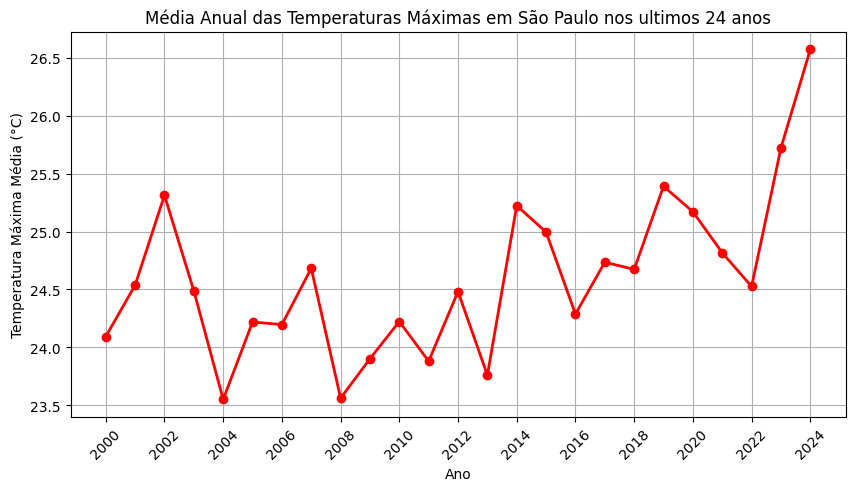

In [11]:
# Criar DataFrame com médias anuais
df_yearly = df.groupby("year")["temp_max"].mean().reset_index()

# Criar gráfico da média anual das temperaturas máximas
plt.figure(figsize=(10, 5))
plt.plot(df_yearly["year"], df_yearly["temp_max"], marker="o", color="red", linewidth=2, linestyle="-")
plt.title("Média Anual das Temperaturas Máximas em São Paulo nos ultimos 24 anos")
plt.xlabel("Ano")
plt.ylabel("Temperatura Máxima Média (°C)")
plt.xticks(ticks=df_yearly["year"][::2], labels=df_yearly["year"][::2], rotation=45)
plt.grid()
plt.show()

In [12]:
df.to_csv("data/clima_data_24_anos_sp.csv", index=False)